In [1]:
import katdal
import numpy as np
import pickle

In [2]:
import time

In [3]:
np.set_printoptions(precision=1,suppress=True)

In [4]:
def target(h):
    h.catalogue.remove('Nothing')
    if len(h.catalogue) >0 :
        tgt=str(h.catalogue.targets[0])[0:12]
    else:
        tgt="Nothing:Bad DATA"
    return tgt

In [5]:
def get_ants(h):
    a_list=[]
    aa=h.file['TelescopeState']['cal_antlist']
    for i,ai in enumerate(aa):
        a_list.append(pickle.loads(ai[1]))
    a_array=np.array(a_list)
    labels=a_array[0]
    return labels

In [6]:
def get_ut(f):
    nn=int(f[-13:-3])
    print nn
    ut=time.asctime(time.gmtime(nn))
    return ut

In [7]:
def phases(h):
    g = h.file['TelescopeState']['cal_product_G']
    g_list = []
    for i, gi in enumerate(g):
        g_list.append(pickle.loads(gi[1]))
    g_array = np.array(g_list)
    HH=g_array[:,0,:]
    VV=g_array[:,1,:]
    HHbefore=np.rad2deg(np.angle(HH)[0])
    HHafter=np.rad2deg(np.angle(HH)[-1])
    VVbefore=np.rad2deg(np.angle(VV)[0])
    VVafter=np.rad2deg(np.angle(VV)[-1])
    return HHbefore, HHafter,VVbefore,VVafter

In [8]:
files=['/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/23/1482495059.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/23/1482496748.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/24/1482566016.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/24/1482566945.h5']

In [9]:
Hphases=np.empty([9]) # 9 antennase in  use
Vphases=np.empty([9])

In [10]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    print get_ants(h)
    labels=get_ants(h)
    print p[0],"\n",p[1],"\n\n",p[2],"\n",p[3]
    Hnew=np.vstack((Hphases,p[1]))
    Vnew=np.vstack((Vphases,p[3]))
    Hphases=Hnew
    Vphases=Vnew

1482495059
Fri Dec 23 12:10:59 2016 1482495059 PKS 1934-63 
['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm022' 'm062' 'm063']
[  0.  -40.4  46.4 -14.8  54.6 -23.3 -37.8  16.  -20.6] 
[  0.  -40.5  44.7 -16.3  55.1 -22.8 -38.7  17.3 -19.8] 

[  0.  -97.9 -13.5 -37.9 -45.8 -79.  -83.6 -74.1 -37.6] 
[  0.  -98.1 -15.3 -39.5 -45.4 -78.5 -84.6 -72.7 -36.8]
1482496748
Fri Dec 23 12:39:08 2016 1482496748 PKS 1934-63 
['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm022' 'm062' 'm063']
[  0.  -28.   45.3 -10.8  56.4 -11.4 -22.6  25.9  -8.9] 
[  0.  -27.7  45.1  -9.9  56.6 -10.8 -23.5  23.5  -8.8] 

[  0.  -85.6 -18.  -28.4 -43.2 -66.6 -67.8 -62.4 -35.9] 
[  0.  -85.3 -18.2 -27.4 -42.9 -66.  -68.7 -64.8 -35.8]
1482566016
Sat Dec 24 07:53:36 2016 1482566016 PKS 1934-63 
['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm022' 'm062' 'm063']
[  0.  -28.   45.3 -10.8  56.4 -11.4 -22.6  25.9  -8.9] 
[  0.   -8.6  -5.6  -6.4 -13.7  -3.4  -4.   47.  -70.9] 

[  0.  -85.6 -18.  -28.4 -43.2 -66.6 -67.8 -62.4 -35.9

In [11]:
labels=get_ants(h)

In [12]:
Hphases[1:]

array([[  0. , -40.5,  44.7, -16.3,  55.1, -22.8, -38.7,  17.3, -19.8],
       [  0. , -27.7,  45.1,  -9.9,  56.6, -10.8, -23.5,  23.5,  -8.8],
       [  0. ,  -8.6,  -5.6,  -6.4, -13.7,  -3.4,  -4. ,  47. , -70.9],
       [  0. ,  -8.6,  -5.6,  -6.4, -13.7,  -3.4,  -4. ,  47. , -70.9]])

In [13]:
Vphases[1:]

array([[  0. , -98.1, -15.3, -39.5, -45.4, -78.5, -84.6, -72.7, -36.8],
       [  0. , -85.3, -18.2, -27.4, -42.9, -66. , -68.7, -64.8, -35.8],
       [  0. ,   7.9,   0.3,   0.5,  -6.7,  -0.8,   8.5,  47.9, -64.1],
       [  0. ,   7.9,   0.3,   0.5,  -6.7,  -0.8,   8.5,  47.9, -64.1]])

In [14]:
import matplotlib.pylab as plt
%matplotlib inline

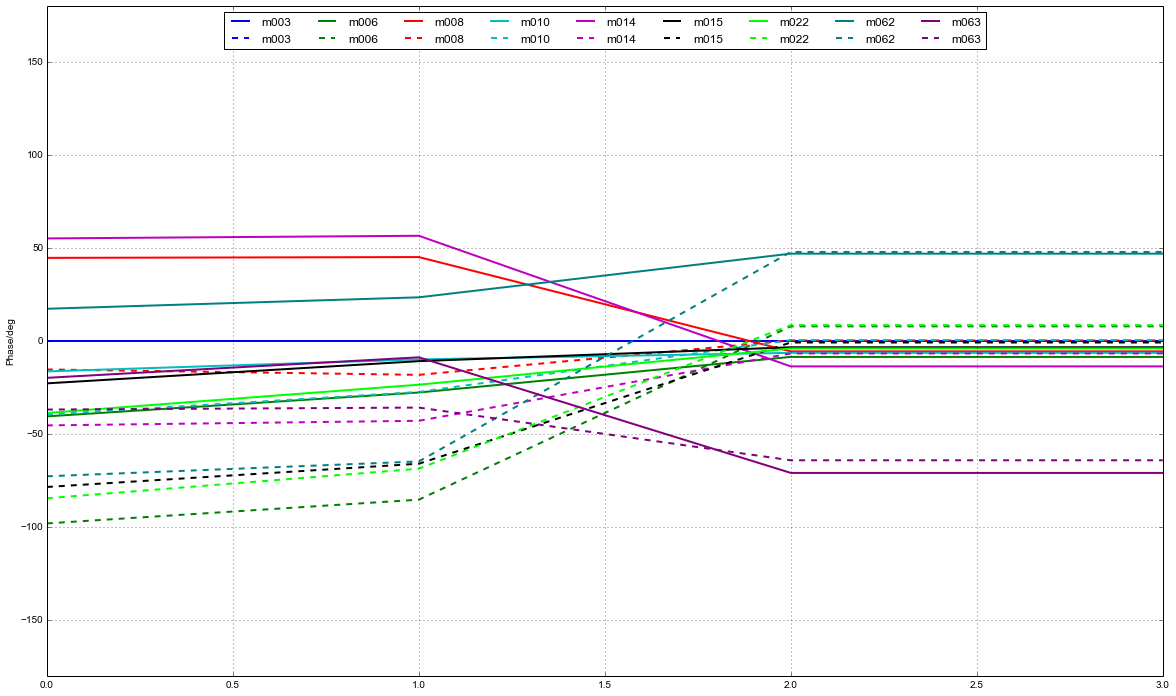

In [15]:
colors=['b','g','r','c','m','k','lime','teal','purple','saddlebrown','grey']
plt.figure(figsize=(20,12))
nants=len(labels)
plt.ylim([-180,180])

for i in range(len(labels)):
    plt.plot(Hphases[1:,i], label=labels[i],color=colors[i],linewidth=2)
    plt.plot(Vphases[1:,i], linestyle='--', label=labels[i],color=colors[i],linewidth=2)
plt.ylabel("Phase/deg")
#plt.xlabel("Time Offset/hours")
plt.legend(loc='upper center',ncol=nants)
plt.grid()

# Large jump in  phases between 23rd and 24th Dec.
* First pair agree 
* Second pair agree 